In [27]:
import pandas as pd
import requests
import json
from deep_translator import GoogleTranslator
import os

### get review data

In [28]:
key_google = os.environ.get('key_google')
key_outscraper = os.environ.get('key_outscraper')

#### get lat lon

In [ ]:
#### calculate centroids

In [9]:
areas = gpd.read_file('../data/raw/geodata/green_areas.geojson')

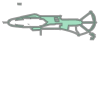

In [11]:
areas.iloc[0]['geometry']

##### get place IDs and review text

In [81]:
url_places = 'https://places.googleapis.com/v1/places:searchNearby'

In [82]:
payload = json.dumps({
  "includedTypes": [
    "playground",
    "park"
  ],
  "maxResultCount": 1,
  "locationRestriction": {
    "circle": {
      "center": {
        "latitude": 52.496540,
        "longitude": 13.438020
      },
      "radius": 100
    }
  }
})

headers = {
  'X-Goog-FieldMask': 'places.id,places.displayName,places.formattedAddress,places.types,places.websiteUri',
  'Content-Type': 'application/json',
  'X-Goog-Api-Key': key_google
}

In [83]:
response = requests.request("POST", url_places, headers=headers, data=payload)

In [84]:
#ip adress need to be changed
response.json()

{'places': [{'id': 'ChIJZ7MZiExPqEcRG1LUMlDEr-0',
   'types': ['park', 'state_park', 'point_of_interest', 'establishment'],
   'formattedAddress': 'Görlitzer Str. 3, 10997 Berlin, Germany',
   'websiteUri': 'https://www.berlin.de/ba-friedrichshain-kreuzberg/politik-und-verwaltung/aemter/strassen-und-gruenflaechenamt/gruenflaechen/gruenanlagen/artikel.489464.php',
   'displayName': {'text': 'Görlitzer Park', 'languageCode': 'en'}}]}

In [85]:
place_ids = [i['id'] for i in response.json()['places']]
id = place_ids[0]

In [86]:
headers = {
  'X-API-KEY': key_outscraper
}

In [134]:
#url_scrapejobs = f'https://api.app.outscraper.com/maps/reviews-v3?limit=1000&async=false&query={id}&reviewsLimit=500'

In [135]:
response = requests.request("GET", url_scrapejobs, headers=headers)

In [ ]:
response = response.json()['data']

In [156]:
response[0]

{'query': 'ChIJZ7MZiExPqEcRG1LUMlDEr-0',
 'name': 'Görlitzer Park',
 'name_for_emails': 'Görlitzer Park',
 'place_id': 'ChIJZ7MZiExPqEcRG1LUMlDEr-0',
 'google_id': '0x47a84f4c8819b367:0xedafc45032d4521b',
 'kgmid': '/g/120jxcsh',
 'full_address': 'Görlitzer Str. 3, 10997 Berlin, Germany',
 'borough': 'Friedrichshain-Kreuzberg',
 'street': 'Görlitzer Str. 3',
 'postal_code': '10997',
 'area_service': False,
 'country_code': 'DE',
 'country': 'Germany',
 'city': 'Berlin',
 'us_state': None,
 'state': None,
 'plus_code': '9F4MFCWP+JX',
 'latitude': 52.496592799999995,
 'longitude': 13.4374489,
 'h3': '891f1d4d2d7ffff',
 'time_zone': 'Europe/Berlin',
 'popular_times': [{'day': 7,
   'day_text': 'Sunday',
   'popular_times': [{'hour': 4,
     'percentage': 4,
     'title': 'Usually not busy',
     'time': '3a'},
    {'hour': 5, 'percentage': 4, 'title': 'Usually not busy', 'time': '3a'},
    {'hour': 6, 'percentage': 4, 'title': 'Usually not busy', 'time': '6a'},
    {'hour': 7, 'percentage

In [145]:
df = pd.DataFrame(response[0]['reviews_data'])

In [147]:
df.review_text

0      I happened to visit the park around midday on ...
1      The park is nice, it surprised me that there w...
2      Legenday park in Berlin! Somehow between Kreuz...
3      I have to be honest and didn't feel particular...
4      Watched a local men’s soccer game! Looks a lit...
                             ...                        
356    Precioso de día y tentador de noche.\n\nAquí e...
357    Park der in die Jahre gekommen ist und wenig g...
358                    Sehr schöner Park zum Chillen 😉😏😁
359    Sehr viele dubiose Menschen! Vor Allem mit Kin...
360    Schöner Park bei dem man bei schönem Wetter gu...
Name: review_text, Length: 361, dtype: object

In [172]:
df.columns

Index(['google_id', 'review_id', 'review_pagination_id', 'author_link',
       'author_title', 'author_id', 'author_image', 'author_reviews_count',
       'author_ratings_count', 'review_text', 'review_img_urls',
       'review_img_url', 'review_questions', 'review_photo_ids',
       'owner_answer', 'owner_answer_timestamp',
       'owner_answer_timestamp_datetime_utc', 'review_link', 'review_rating',
       'review_timestamp', 'review_datetime_utc', 'review_likes',
       'reviews_id'],
      dtype='object')

In [173]:
cols =['google_id','review_text', 'review_img_urls', 'review_rating', 'review_timestamp', 'review_likes']

In [174]:
df = df[cols]

In [176]:
df.review_rating.describe()

count    361.000000
mean       3.623269
std        1.522757
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: review_rating, dtype: float64

In [196]:
df['review_text_english'] = df['review_text'].apply(lambda x: GoogleTranslator(source='de', target='en').translate(x))
#df['review_text_english'] = df['review_text_english'].apply(lambda x: GoogleTranslator(source='es', target='en').translate(x))

/tmp/ipykernel_3356/500012155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text_english'] = df['review_text'].apply(lambda x: GoogleTranslator(source='de', target='en').translate(x))


In [197]:
df['review_text_english']

0      I happened to visit the park around midday on ...
1      The park is nice, it surprised me that there w...
2      Legenday park in Berlin! Somehow between Kreuz...
3      I have to be honest and didn't feel particular...
4      Watched a local men’s soccer game! Looks a lit...
                             ...                        
356    Precioso de day y tentador de noche.\n\nAquí e...
357    Park that is getting old and not well maintain...
358                          Very nice park to chill 😉😏😁
359    Lots of dubious people! Especially with childr...
360    Beautiful park where you can relax when the we...
Name: review_text_english, Length: 361, dtype: object

In [202]:
df.to_csv('../data/raw/reviews_en_goerlitzerpark.csv')